<a href="https://colab.research.google.com/github/G-Shivani973/FMML_Projects/blob/main/Mod4_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mod 4 Lab 2

###Q1. Change the coefficients array and try a different polynomial instead of our  x^2 .

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
random.seed(42)
np.random.seed(42)

In [5]:
def eval_2nd_degree(coeffs,x):
  """
  Function to return the output of evaluating a second-degree polynomial, given a specific x value
  Args:coeffs: List containig the coeefficients a,b, and c for the polynomial.
  x:input x val to the polynomial.
  Returns:
  y: The correspomding output y value for the secong-degree polynomial.
  """
  a=coeffs[0]*(x*x)
  b=coeffs[1]*x
  c=coeffs[2]
  y=a+b+c
  return y

In [7]:
hundred_xs=np.random.uniform(-10,10,100)
coeffs=[2,-3,1]


In [9]:
xs=[]
ys=[]
for x in hundred_xs:
  y=eval_2nd_degree(coeffs,x)
  xs.append(x)
  ys.append(y)


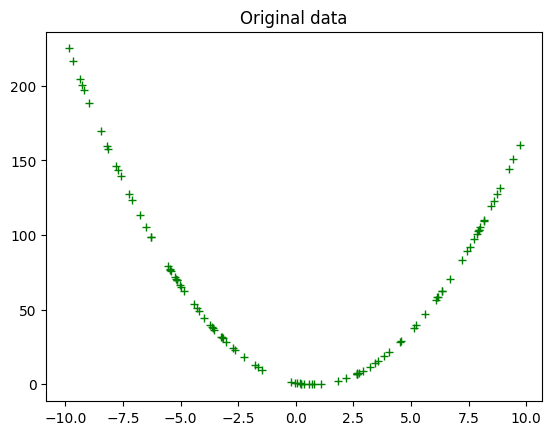

In [10]:
plt.plot(xs,ys,'g+')
plt.title('Original data')
plt.show()

In [12]:
def eval_2nd_degree_jitter(coeffs,x,j):
  """
  Function to return the noisy output  of evaluating a second-degree polynomial, given a specific x value. Output values can be within [y-j,y+j].
  Args:
  coefffs:List containing the coeeficients a,b, and c for the polynomial.
  x: Input x value to the polynomial.
  j:Jitter paramter, to introduce noise to output y.

  Return:
  y: Corresponding jittered output y value for the second-degree polynomial
  """
  a=coeffs[0]*(x*x)
  b=coeffs[1]*x
  c=coeffs[2]
  y=a+b+c

  interval=[y-j,y+j]
  interval_min=interval[0]
  interval_max=interval[1]
  jit_val=random.random()*interval_max

  while interval_min>jit_val:
    jit_val=random.random()*interval_max
  return jit_val

In [13]:
xs=[]
ys=[]
for x in hundred_xs:
  y=eval_2nd_degree_jitter(coeffs,x,0.1)
  xs.append(x)
  ys.append(y)


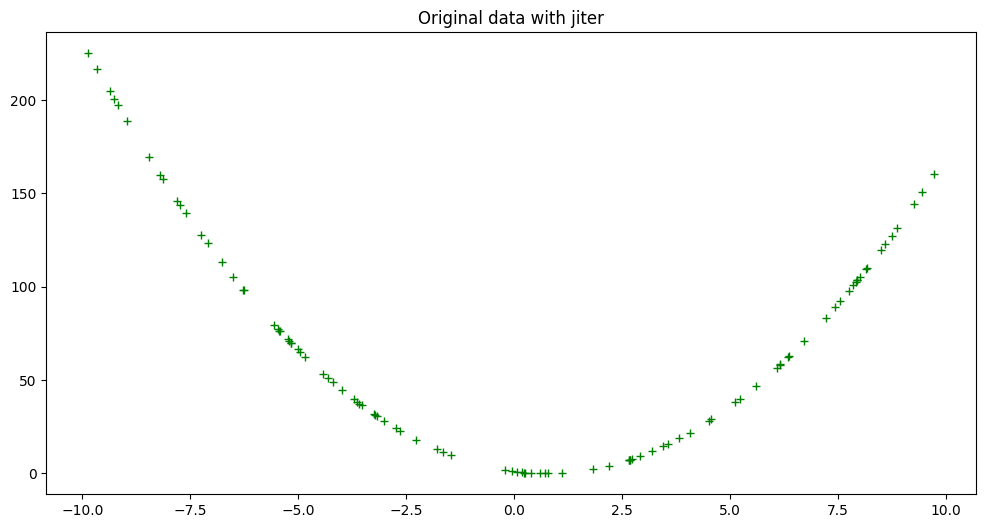

In [14]:
plt.figure(figsize=(12,6))
plt.plot(xs,ys,'g+')
plt.title('Original data with jiter')
plt.show()

In [15]:
def loss_mse(ys,y_bar):
  """
  Calculate MSE loss.
  Args:
  ys: training data labels
  y_bar:prediction labels

  Returns: Calculated MSE loss.
  """
  return sum((ys-y_bar)*(ys-y_bar))/len(ys)

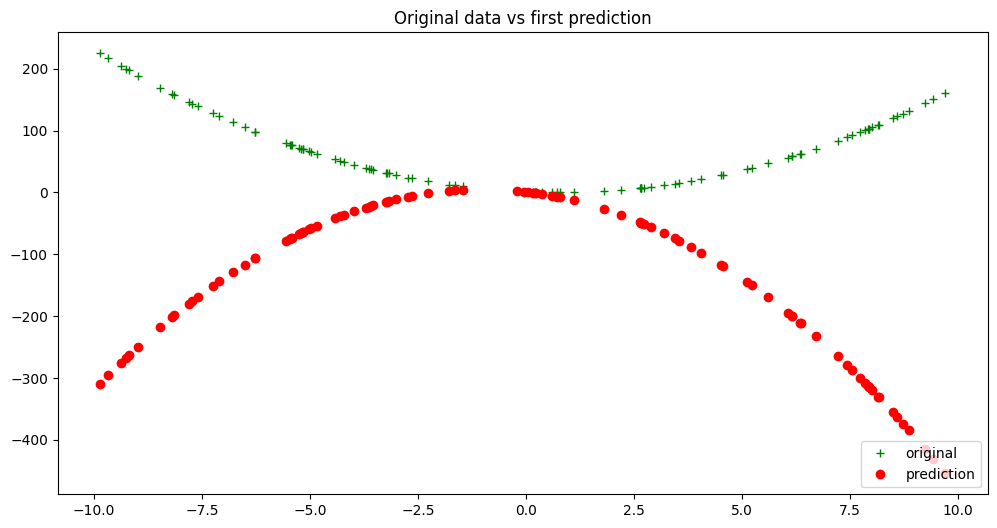

In [17]:
rand_coeffs=(random.randrange(-10,10),random.randrange(-10,10),random.randrange(-10,10))
y_bar=eval_2nd_degree(rand_coeffs,hundred_xs)
plt.figure(figsize=(12,6))
plt.plot(xs,ys,'g+',label='original')
plt.plot(xs,y_bar,'ro',label='prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [19]:
initial_model_loss=loss_mse(ys,y_bar)
initial_model_loss

72144.05757382853

In [29]:
def calc_gradient_2nd_poly(rand_coeffs,hundred_xs,ys):
  """
  calculate the gradient for a second-degree polynomial
  Args:
  coeffs: a,b,and c, for a 2nd-degree polynomial [y=ax^2+bx+c]
  inputs_x:x input datapoints
  outputs_y:actual y output points
  Return : Calculated gradients for the 2nd-degree polynomial, as a tuple of itsparts for a,b,c respectively.
  """
  a_s=[]
  b_s=[]
  c_s=[]
  y_bars=eval_2nd_degree(rand_coeffs,hundred_xs)
  for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):
       x_squared = x ** 2
       partial_a = x_squared * (y - y_bar)
       a_s.append(partial_a)
       partial_b = x * (y - y_bar)
       b_s.append(partial_b)
       partial_c = (y - y_bar)
       c_s.append(partial_c)
  num=[i for i in y_bars]
  n=len(num)
  gradient_a = (-2 / n) * sum(a_s)
  gradient_b = (-2 / n) * sum(b_s)
  gradient_c = (-2 / n) * sum(c_s)

  return (gradient_a, gradient_b, gradient_c)

calc_grad=calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

In [30]:
lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]



In [31]:
new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")


New model coeffs: (-1.6316303125823617, -7.956206514535347, 1.0407844696030724)


Update with these new coeffs

In [32]:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)


In [33]:
print(f"Now have a smaller model loss: {updated_model_loss} vs {initial_model_loss}")


Now have a smaller model loss: 27057.600716379093 vs 72144.05757382853


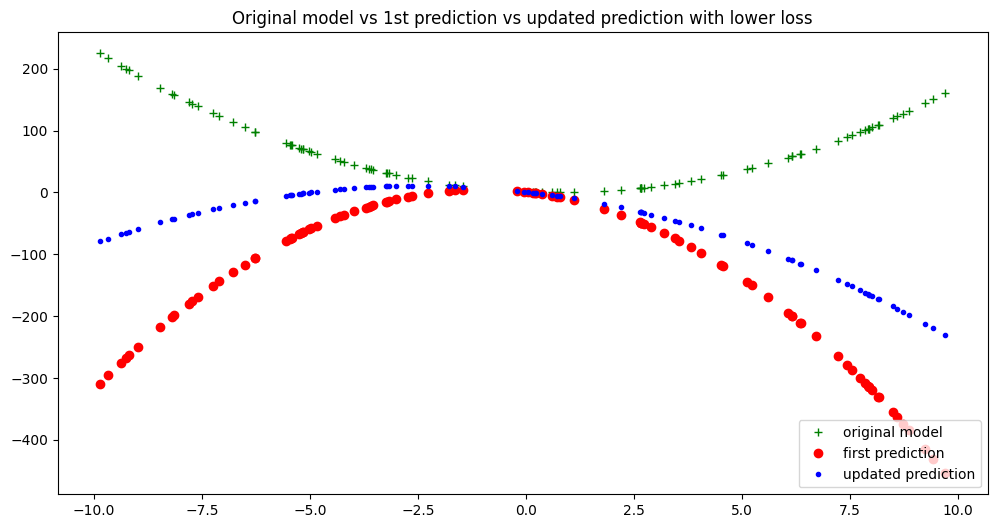

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='original model')
plt.plot(xs, y_bar, 'ro', label='first prediction')
plt.plot(xs, new_y_bar, 'b.', label='updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()


In [35]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second-degree polynomial.

    Args:
        coeffs: a, b, and c, for a 2nd-degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd-degree polynomial, as a tuple of its parts for a, b, c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum

####Q2.Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [38]:
random.seed(42)
np.random.seed(42)


In [39]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second-degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second-degree polynomial.

    """
    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

In [41]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second-degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second-degree polynomial.

    """
    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max

    while interval_min > jit_val:
        jit_val = random.random() * interval_max

    return jit_val


In [42]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """
    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)


In [43]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second-degree polynomial.

    Args:
        coeffs: a, b, and c, for a 2nd-degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd-degree polynomial, as a tuple of its parts for a, b, c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)


In [44]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second-degree polynomial.

    Args:
        coeffs: a, b, and c, for a 2nd-degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd-degree polynomial, as a tuple of its parts for a, b, c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar


In [45]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second-degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses

Experiment with different learning rates

In [46]:
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0]


[66641.71240850617, 61563.803439577256, 56877.58422336082, 52552.834805136685, 48561.66679273057, 44878.34346927309, 41479.11378481463, 38342.05915599868, 35446.952085613055, 32775.125690078814, 30309.35329329559, 28033.7373101932, 25933.606703260015, 23995.42235061628, 22206.689715232464, 20555.878251986727, 19032.34703271655, 17626.276109526923, 16328.603173630929, 15130.965101156242, 14025.6440088729, 13005.517471887955, 12064.012582198617, 11195.063551769668, 10393.072586664175, 9652.873779855758, 8969.69978982166, 8339.151089985187, 7757.167590658481, 7220.002450439913, 6724.197908142961, 6266.562979366268, 5844.1528738421675, 5454.2500008001725, 5094.346439825307, 4762.127764143751, 4455.45811199191, 4172.366409775361, 3911.033658153615, 3669.781199042627, 3447.059887854256, 3241.44010113083, 3051.6025151215454, 2876.329595820112, 2714.49774557225, 2565.070055596633, 2427.0896176712054, 2299.673351843499, 2182.0063103521684, 2073.336421018516, 1972.9696362015932, 1880.26545602636

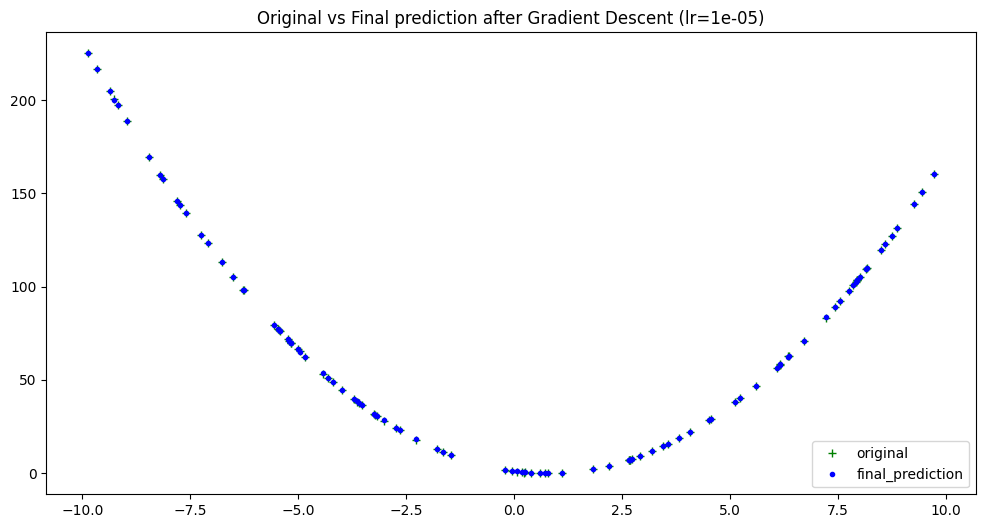

[27057.600716379093, 10466.270956602913, 4356.477430706641, 2102.2303819988733, 1266.2725738767672, 952.0997416296303, 829.9470229489948, 778.5148788931787, 753.1841579593856, 737.5412819557172, 725.5476221399906, 714.9808117928739, 705.0222460431766, 695.3696851082204, 685.9108405030797, 676.6033091544808, 667.4304090324146, 658.3849338476472, 649.4631772984429, 640.6627347963982, 631.9816946754216, 623.4183405007353, 614.9710413797845, 606.6382114289579, 598.4182946806038, 590.3097593503071, 582.3110955496238, 574.4208142685924, 566.6374468276991, 558.9595445048707, 551.3856782291808, 543.9144383013787, 536.5444341265485, 529.2742939534586, 522.1026646185733, 515.0282112939444, 508.04961723867774, 501.1655835538154, 494.3748289405677, 487.67608946182406, 481.06811830690026, 474.549685559472, 468.1195779686576, 461.7765987231983, 455.51956722870113, 449.3473188878988, 443.2587048838881, 437.25259196630554, 431.3278622403986, 425.4834129589567, 419.7181563170619, 414.03101924961805, 40

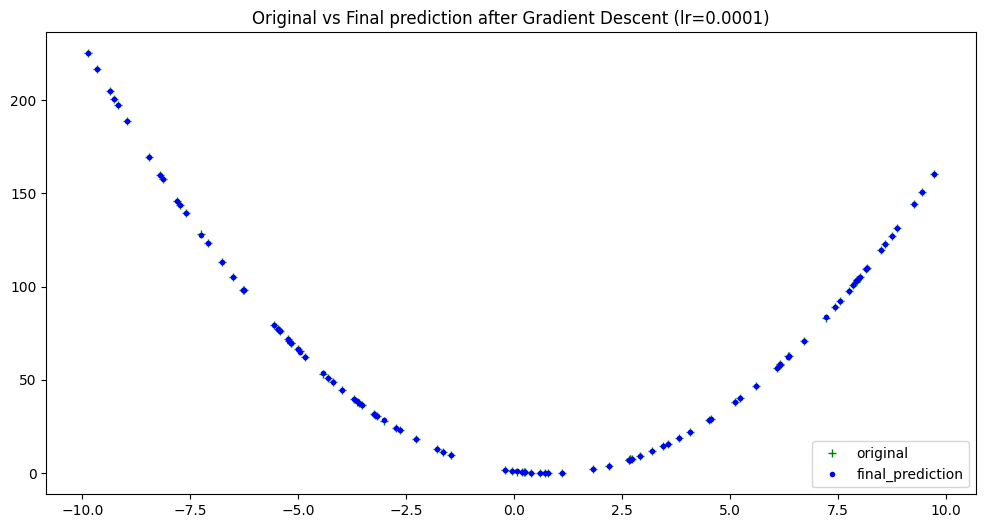

<ipython-input-42-034392b39b26>:11: RuntimeWarning: overflow encountered in double_scalars
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-42-034392b39b26>:11: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-44-374e08418a15>:32: RuntimeWarning: overflow encountered in double_scalars
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-44-374e08418a15>:33: RuntimeWarning: invalid value encountered in double_scalars
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-44-374e08418a15>:36: RuntimeWarning: invalid value encountered in double_scalars
  a_new = coeffs[0] - lr * gradient_a


[614978.9685766945, 5292187.146727959, 45585607.40384527, 392701388.0214325, 3382995156.233476, 29143435362.20709, 251061520925.3197, 2162815987142.5398, 18631979053303.324, 160508635751666.22, 1382731382287506.0, 1.1911795690063692e+16, 1.0261637103158771e+17, 8.840077413749094e+17, 7.61544848014763e+18, 6.5604691949396615e+19, 5.651637742668822e+20, 4.868708048960286e+21, 4.194238757917456e+22, 3.613204690343602e+23, 3.11266212722789e+24, 2.6814604620026357e+25, 2.3099937980377424e+26, 1.9899869576997655e+27, 1.714311135890966e+28, 1.4768250913748796e+29, 1.2722383381012682e+30, 1.0959932888381653e+31, 9.441637256200056e+31, 8.133673352340044e+32, 7.006903612943105e+33, 6.036226943752304e+34, 5.2000195420380636e+35, 4.4796531822855495e+36, 3.8590802344746594e+37, 3.3244761703884276e+38, 2.86393159404861e+39, 2.467186935628264e+40, 2.1254038986070385e+41, 1.8309685686883996e+42, 1.577321798328304e+43, 1.3588130883447412e+44, 1.170574711522926e+45, 1.0084132740627084e+46, 8.68716299178

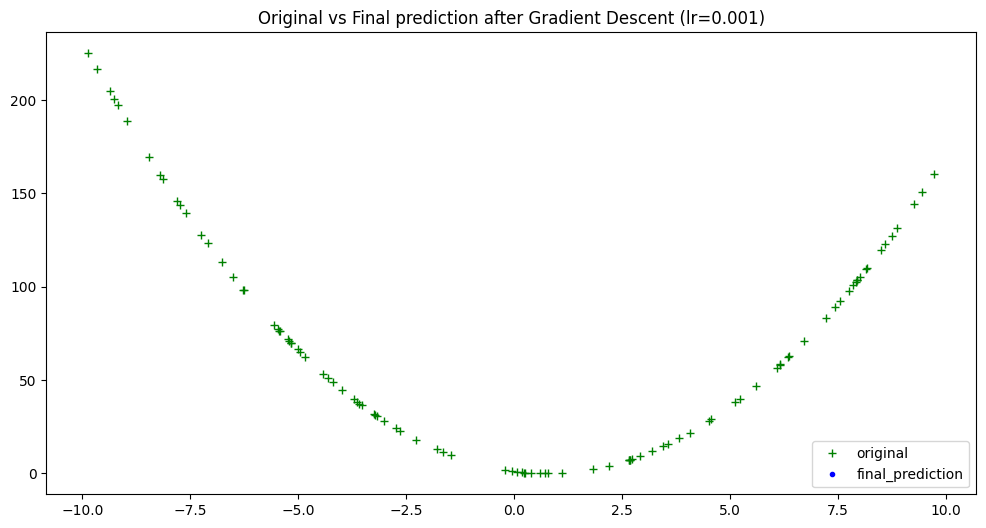

[104870441.12533844, 154241497612.72787, 226855717425955.97, 3.336554515375185e+17, 4.907346466903218e+20, 7.217640004158465e+23, 1.0615579637787998e+27, 1.5613210271126296e+30, 2.2963638660168287e+33, 3.377452114956596e+36, 4.967497946486661e+39, 7.306109756249311e+42, 1.074569941354774e+46, 1.5804588178757154e+49, 2.3245113964865948e+52, 3.418851014200212e+55, 5.02838672891197e+58, 7.395663920562214e+61, 1.087741412398099e+65, 1.5998311888621731e+68, 2.3530039434771675e+71, 3.4607573577539997e+74, 5.090021851620707e+77, 7.486315789209363e+80, 1.101074331889563e+84, 1.6194410154238054e+87, 2.3818457360060665e+90, 3.5031773655835257e+93, 5.152412462830248e+96, 7.578078817230099e+99, 1.114570678772995e+103, 1.6392912081568487e+106, 2.4110410549277137e+109, 3.54611733389516e+112, 5.215567822891654e+115, 7.670966624588008e+118, 1.1282324562490034e+122, 1.6593847133339908e+125, 2.4405942335688462e+128, 3.589583636070664e+131, 5.279497305664187e+134, 7.7649929981926e+137, 1.1420616920723046

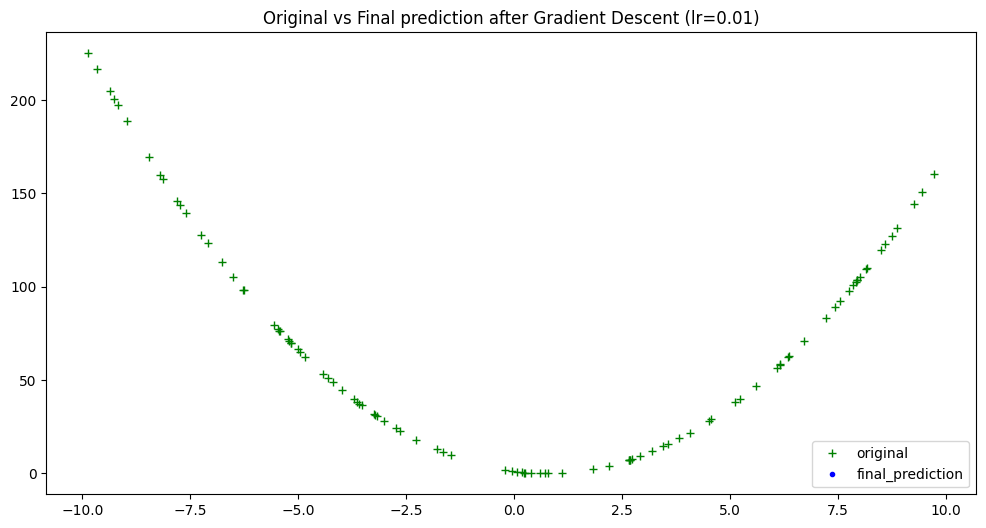

[10985049910.508816, 1692378854367338.2, 2.607319569873204e+20, 4.016899245532346e+25, 6.188531599732131e+30, 9.53420064082479e+35, 1.4688618841897557e+41, 2.262963950629464e+46, 3.4863766954326804e+51, 5.371195797915883e+56, 8.274993444438697e+61, 1.2748653946309883e+67, 1.964088292444405e+72, 3.025921667309652e+77, 4.661807705853527e+82, 7.182093086262096e+87, 1.106490536599464e+93, 1.704685936090205e+98, 2.6262801574738253e+103, 4.046110382866296e+108, 6.233534980550391e+113, 9.603533931819915e+118, 1.4795435377740227e+124, 2.2794203630767367e+129, 3.511729840289735e+134, 5.410255462724501e+139, 8.335169703579837e+144, 1.284136293861602e+150, 1.9783712628003053e+155, 3.0479263550009937e+160, 4.695708657009216e+165, 7.234321707062405e+170, 1.1145370035501253e+176, 1.7170825166232475e+181, 2.645378627629048e+186, 4.075533945379998e+191, 6.278865628710225e+196, 9.67337141875352e+201, 1.4903028689973582e+207, 2.2959964475632088e+212, 3.5372673547689594e+217, 5.4495991718078323e+222, 8.3

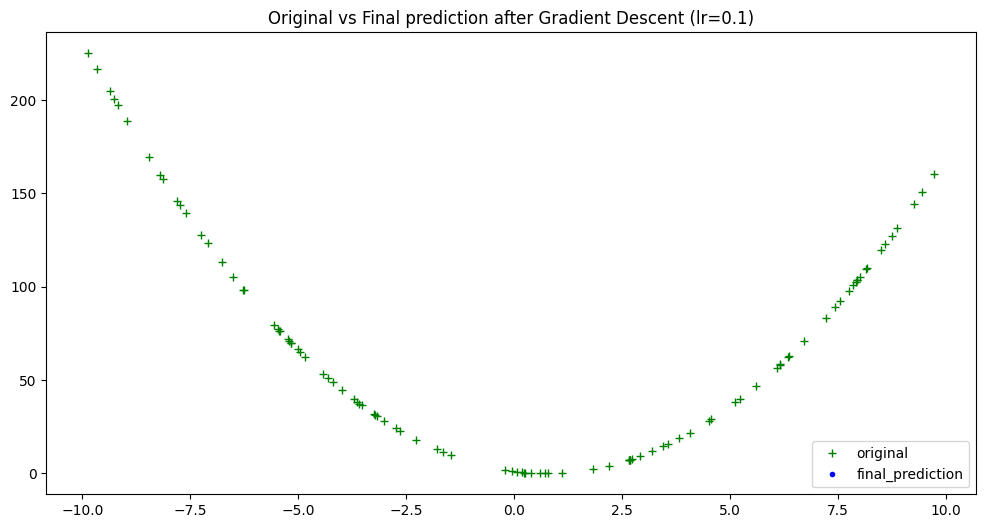

[275747067549.0604, 1.0663865985149219e+18, 4.1240117734502684e+24, 1.5948693604301828e+31, 6.167800715834525e+37, 2.385259044664813e+44, 9.224456126717604e+50, 3.567352192796957e+57, 1.3795937118280406e+64, 5.3352702700857256e+70, 2.063296506124451e+77, 7.97933798415982e+83, 3.085830585980518e+90, 1.193375994885308e+97, 4.615114879082e+103, 1.7847925078441924e+110, 6.902286030830916e+116, 2.6693048207014626e+123, 1.0322939666645961e+130, 3.992166145086759e+136, 1.5438810110913995e+143, 5.970614673294867e+149, 2.309001750838528e+156, 8.929548090286018e+162, 3.453303102423968e+169, 1.3354877757121787e+176, 5.164700422111098e+182, 1.9973324305368478e+189, 7.724236668200727e+195, 2.987175854864581e+202, 1.1552234830687182e+209, 4.467568568687159e+215, 1.7277322707206585e+222, 6.681618319664093e+228, 2.583966516470126e+235, 9.992912852547419e+241, 3.864535652537045e+248, 1.494522771298133e+255, 5.779732715008881e+261, 2.235182420668522e+268, 8.644068333284366e+274, 3.3429001883497974e+281,

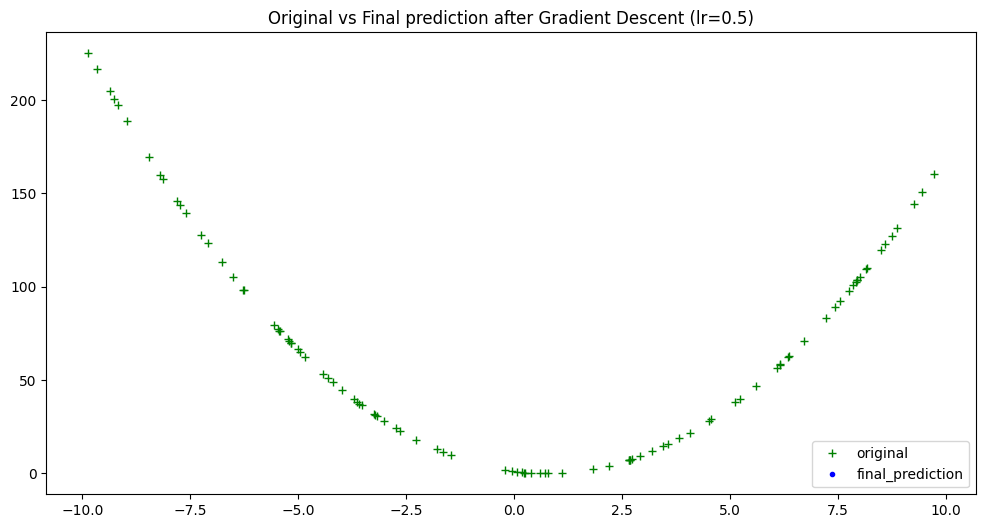

<ipython-input-39-1858d79a2e26>:14: RuntimeWarning: overflow encountered in multiply
  a = coeffs[0] * (x * x)
<ipython-input-44-374e08418a15>:22: RuntimeWarning: overflow encountered in double_scalars
  partial_a = x_squared * (y - y_bar)
<ipython-input-44-374e08418a15>:24: RuntimeWarning: overflow encountered in double_scalars
  partial_b = x * (y - y_bar)


[1103549329385.9302, 1.7079544696028643e+19, 2.6433965100249968e+26, 4.091177628267783e+33, 6.33190454877515e+40, 9.79987154255507e+47, 1.5167234678096686e+55, 2.3474288084441615e+62, 3.633109217114768e+69, 5.6229533078929326e+76, 8.702629624730411e+83, 1.3469036329881185e+91, 2.0845991094476668e+98, 3.2263284029231936e+105, 4.993379742096757e+112, 7.728240319922532e+119, 1.1960976638519595e+127, 1.8511971189405982e+134, 2.8650927735597682e+141, 4.43429633566095e+148, 6.862948444083245e+155, 1.0621766742867926e+163, 1.6439279656422649e+170, 2.544302865655875e+177, 3.93781066292377e+184, 6.094538911364588e+191, 9.432501387600639e+198, 1.459865688299739e+206, 2.2594301768949838e+213, 3.4969139730993774e+220, 5.412164297133772e+227, 8.376392042955488e+234, 1.296411930702956e+242, 2.006453238399242e+249, 3.105382249683448e+256, 4.806191707882798e+263, 7.438529905706781e+270, 1.1512592614094592e+278, 1.781800844766678e+285, 2.7576883477353304e+292, 4.268066796337749e+299, inf, inf, inf, inf

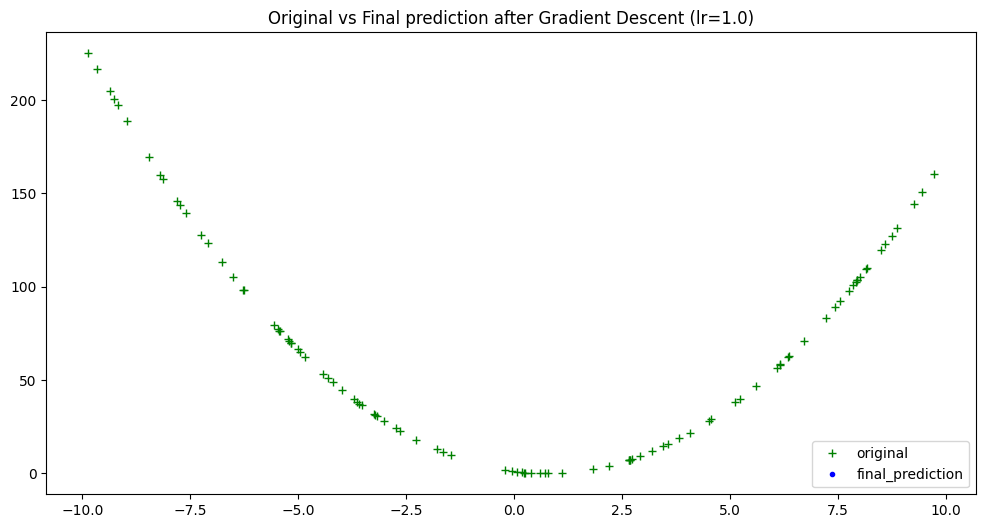

<ipython-input-44-374e08418a15>:34: RuntimeWarning: overflow encountered in double_scalars
  gradient_c = (-2 / n) * sum(c_s)


[27599957015628.08, 1.0683400953877286e+22, 4.135349029641012e+30, 1.600717944458398e+39, 6.196086277956419e+47, 2.398391627756106e+56, 9.283735154810962e+64, 3.593564012950992e+73, 1.3910028775954871e+82, 5.384317625915954e+90, 2.084170835567454e+99, 8.067443961556778e+107, 3.122759946649894e+116, 1.2087632378817393e+125, 4.678901325162138e+133, 1.8111170926217274e+142, 7.010502883543753e+150, 2.7136373943128676e+159, 1.0503993836303483e+168, 4.065903821355602e+176, 1.5738369749778717e+185, 6.092034963536498e+193, 2.3581152677819753e+202, 9.127832734758948e+210, 3.533217038711801e+219, 1.3676436680424171e+228, 5.293898399795096e+236, 2.0491712075461365e+245, 7.931966805404918e+253, 3.0703192183432502e+262, 1.188464391467745e+271, 4.600328204794804e+279, 1.7807028753881647e+288, 6.892775013553858e+296, 2.668067089918972e+305, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, in

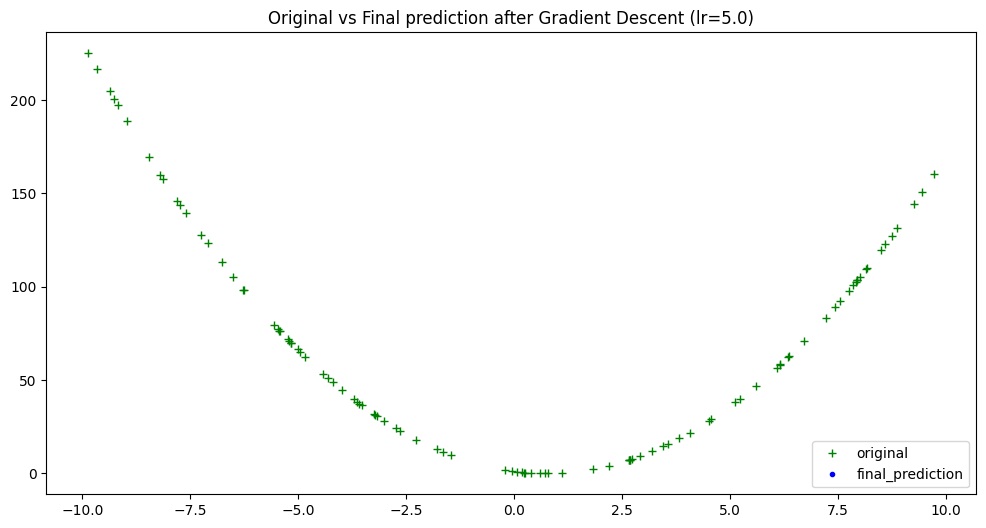

In [50]:
for lr in learning_rates:
    GD = gradient_descent(30000, lr)

    plt.figure(figsize=(12,6))
    plt.plot(hundred_xs, ys, 'g+', label='original')
    plt.plot(hundred_xs, GD[2], 'b.', label='final_prediction')
    plt.title(f'Original vs Final prediction after Gradient Descent (lr={lr})')
    plt.legend(loc="lower right")
    plt.show()

In [51]:
print(f"Final Coefficients predicted (lr={lr}): {GD[1]}")


Final Coefficients predicted (lr=5.0): (nan, nan, nan)


####Q3.Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of  x^2 ?

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [53]:
random.seed(42)
np.random.seed(42)


In [55]:
def eval_5th_degree(coeffs, x):
    """
    Function to return the output of evaluating a fifth-degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the fifth-degree polynomial.

    """
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f
    return y


In [56]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """
    return sum((ys - y_bar) ** 2) / len(ys)


In [57]:
def calc_gradient_5th_poly(coeffs, inputs_x, outputs_y):
    """
    Calculates the gradient for a fifth-degree polynomial.

    Args:
        coeffs: a, b, c, d, e, and f, for a fifth-degree polynomial [ y = ax^5 + bx^4 + cx^3 + dx^2 + ex + f ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the fifth-degree polynomial, as a tuple of its parts for a, b, c, d, e, and f respectively.

    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_pow_5 = x ** 5
        x_pow_4 = x ** 4
        x_pow_3 = x ** 3
        x_pow_2 = x ** 2
        x_pow_1 = x
        partial_a = x_pow_5 * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_pow_4 * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x_pow_3 * (y - y_bar)
        c_s.append(partial_c)
        partial_d = x_pow_2 * (y - y_bar)
        d_s.append(partial_d)
        partial_e = x_pow_1 * (y - y_bar)
        e_s.append(partial_e)
        partial_f = (y - y_bar)
        f_s.append(partial_f)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)
    gradient_f = (-2 / n) * sum(f_s)

    return (gradient_a, gradient_b, gradient_c, gradient_d, gradient_e, gradient_f)


In [63]:
def calc_gradient_5th_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    Calculates the gradient for a fifth-degree polynomial.

    Args:
        coeffs: a, b, c, d, e, and f, for a fifth-degree polynomial [ y = ax^5 + bx^4 + cx^3 + dx^2 + ex + f ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the fifth-degree polynomial, as a tuple of its parts for a, b, c, d, e, and f respectively.

    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_pow_5 = x ** 5
        x_pow_4 = x ** 4
        x_pow_3 = x ** 3
        x_pow_2 = x ** 2
        x_pow_1 = x
        partial_a = x_pow_5 * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_pow_4 * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x_pow_3 * (y - y_bar)
        c_s.append(partial_c)
        partial_d = x_pow_2 * (y - y_bar)
        d_s.append(partial_d)
        partial_e = x_pow_1 * (y - y_bar)
        e_s.append(partial_e)
        partial_f = (y - y_bar)
        f_s.append(partial_f)
    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)
    gradient_f = (-2 / n) * sum(f_s)

    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[3] - lr * gradient_d
    e_new = coeffs[4] - lr * gradient_e
    f_new = coeffs[5] - lr * gradient_f

    new_model_coeffs = (a_new, b_new, c_new, d_new, e_new, f_new)

    # update with these new coeffs:
    new_y_bar = eval_5th_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar



In [64]:
def gradient_descent(epochs, lr, initial_coeffs):
    """
    Perform gradient descent for a fifth-degree polynomial.

    Args:
        epochs: number of iterations to perform finding new coefficients and updating loss.
        lr: specified learning rate
        initial_coeffs: initial coefficients for the polynomial

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    coeffs_to_test = initial_coeffs
    for i in range(epochs):
        loss = calc_gradient_5th_poly_for_GD(coeffs_to_test, hundred_xs, ys, lr)
        coeffs_to_test = loss[1]
        losses.append(loss[0])
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)


Initialize coefficients for a fifth-degree polynomial with roots at x=-3, x=-2, x=-1, x=1, x=4


In [66]:
coeffs_degree_5 = [2, -3, -2, -1, 1, 4]


Generate data points

In [67]:
hundred_xs = np.random.uniform(-10, 10, 100)


Evaluate the fifth-degree polynomial without jitter


In [68]:
ys_degree_5 = [eval_5th_degree(coeffs_degree_5, x) for x in hundred_xs]


Plot the original data

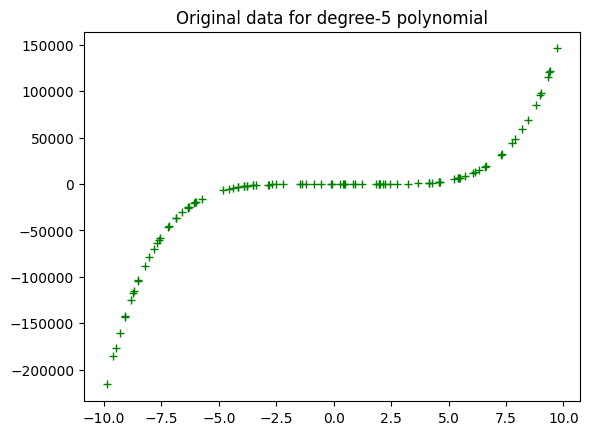

In [69]:
plt.plot(hundred_xs, ys_degree_5, 'g+')
plt.title('Original data for degree-5 polynomial')
plt.show()


Perform gradient descent with different initializations

In [70]:
lr_values = [0.001, 0.01, 0.1, 1.0]
initializations = [
    [1, -1, 0, 0, 0, 0],  # Initialization 1
    [0, 0, 1, -1, 0, 0],  # Initialization 2
    [0, 0, 0, 0, 1, -1],  # Initialization 3
    [0.5, -0.5, 0.5, -0.5, 0.5, -0.5]  # Initialization 4
]


<ipython-input-56-1dbddb50d350>:11: RuntimeWarning: overflow encountered in square
  return sum((ys - y_bar) ** 2) / len(ys)
<ipython-input-63-a937de0f1524>:29: RuntimeWarning: overflow encountered in double_scalars
  partial_a = x_pow_5 * (y - y_bar)
<ipython-input-63-a937de0f1524>:31: RuntimeWarning: overflow encountered in double_scalars
  partial_b = x_pow_4 * (y - y_bar)
<ipython-input-63-a937de0f1524>:33: RuntimeWarning: overflow encountered in double_scalars
  partial_c = x_pow_3 * (y - y_bar)
<ipython-input-63-a937de0f1524>:45: RuntimeWarning: invalid value encountered in double_scalars
  gradient_b = (-2 / n) * sum(b_s)


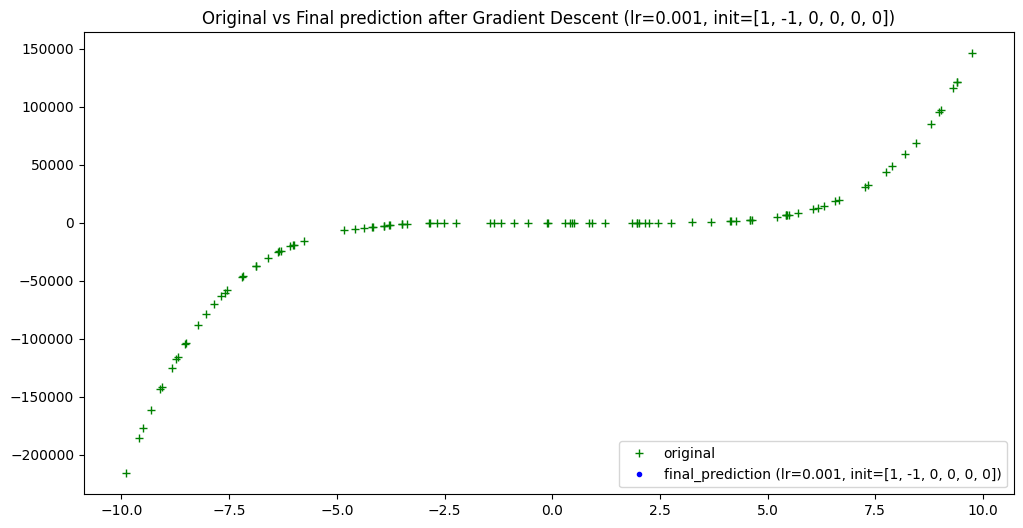

Final Coefficients predicted (lr=0.001, init=[1, -1, 0, 0, 0, 0]): (nan, nan, nan, nan, nan, nan)


<ipython-input-63-a937de0f1524>:47: RuntimeWarning: invalid value encountered in double_scalars
  gradient_d = (-2 / n) * sum(d_s)
<ipython-input-63-a937de0f1524>:49: RuntimeWarning: invalid value encountered in double_scalars
  gradient_f = (-2 / n) * sum(f_s)
<ipython-input-63-a937de0f1524>:51: RuntimeWarning: invalid value encountered in double_scalars
  a_new = coeffs[0] - lr * gradient_a


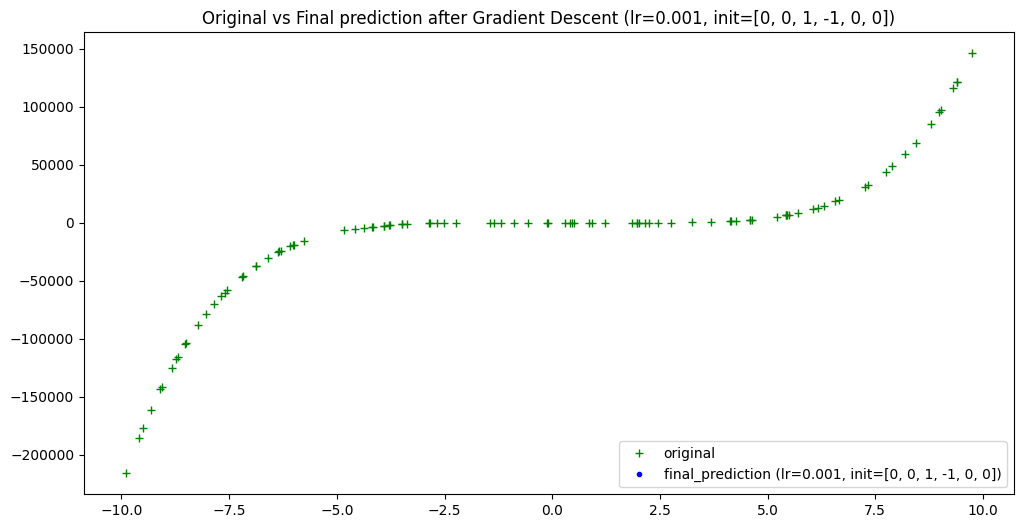

Final Coefficients predicted (lr=0.001, init=[0, 0, 1, -1, 0, 0]): (nan, nan, nan, nan, nan, nan)


<ipython-input-63-a937de0f1524>:44: RuntimeWarning: overflow encountered in double_scalars
  gradient_a = (-2 / n) * sum(a_s)


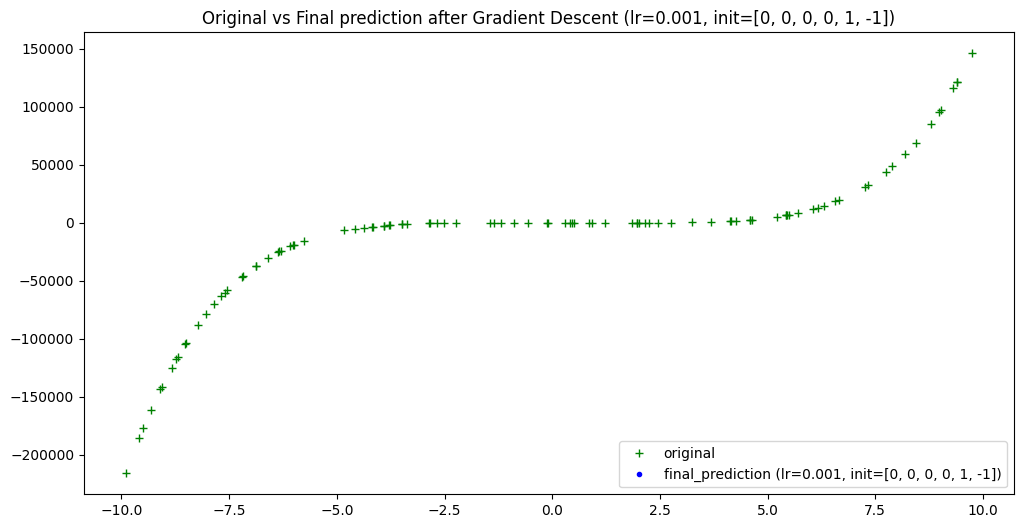

Final Coefficients predicted (lr=0.001, init=[0, 0, 0, 0, 1, -1]): (nan, nan, nan, nan, nan, nan)


<ipython-input-63-a937de0f1524>:46: RuntimeWarning: overflow encountered in double_scalars
  gradient_c = (-2 / n) * sum(c_s)


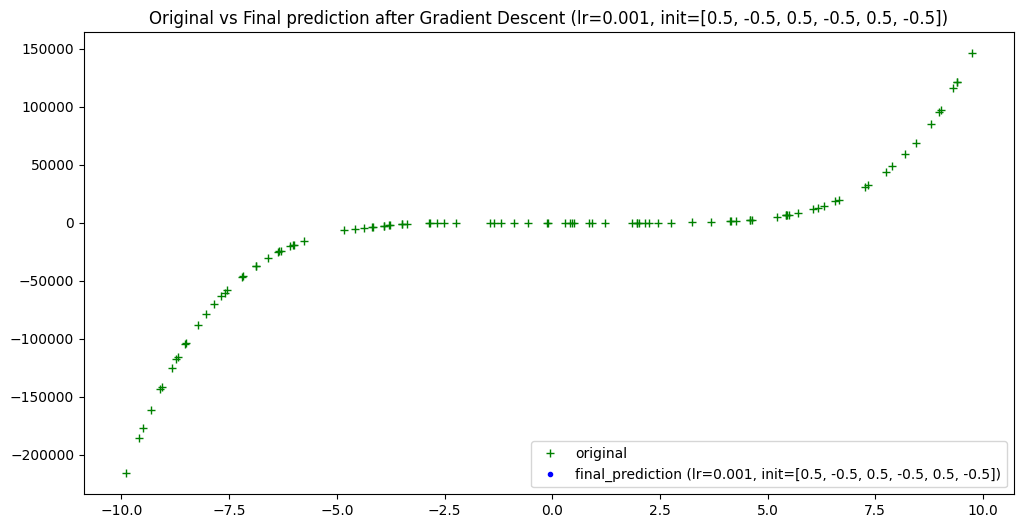

Final Coefficients predicted (lr=0.001, init=[0.5, -0.5, 0.5, -0.5, 0.5, -0.5]): (nan, nan, nan, nan, nan, nan)


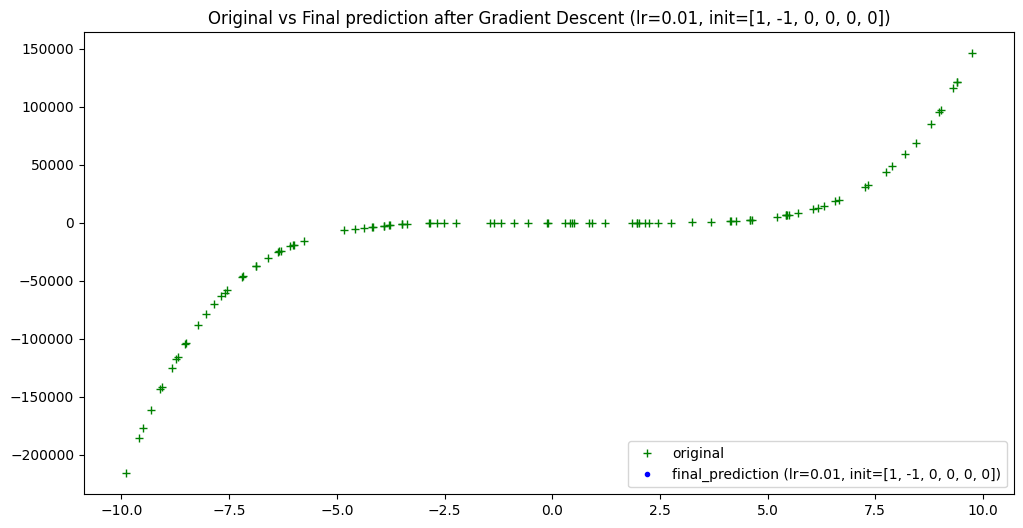

Final Coefficients predicted (lr=0.01, init=[1, -1, 0, 0, 0, 0]): (nan, nan, nan, nan, nan, nan)


<ipython-input-55-842bb65293f5>:14: RuntimeWarning: overflow encountered in multiply
  a = coeffs[0] * (x ** 5)
<ipython-input-63-a937de0f1524>:35: RuntimeWarning: overflow encountered in double_scalars
  partial_d = x_pow_2 * (y - y_bar)
<ipython-input-63-a937de0f1524>:37: RuntimeWarning: overflow encountered in double_scalars
  partial_e = x_pow_1 * (y - y_bar)


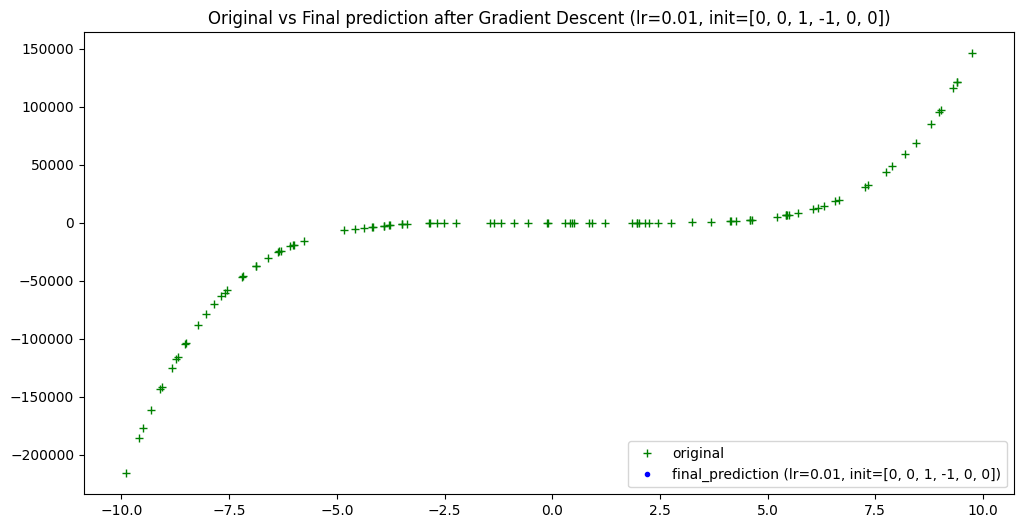

Final Coefficients predicted (lr=0.01, init=[0, 0, 1, -1, 0, 0]): (nan, nan, nan, nan, nan, nan)


<ipython-input-56-1dbddb50d350>:11: RuntimeWarning: overflow encountered in double_scalars
  return sum((ys - y_bar) ** 2) / len(ys)
<ipython-input-63-a937de0f1524>:48: RuntimeWarning: overflow encountered in double_scalars
  gradient_e = (-2 / n) * sum(e_s)


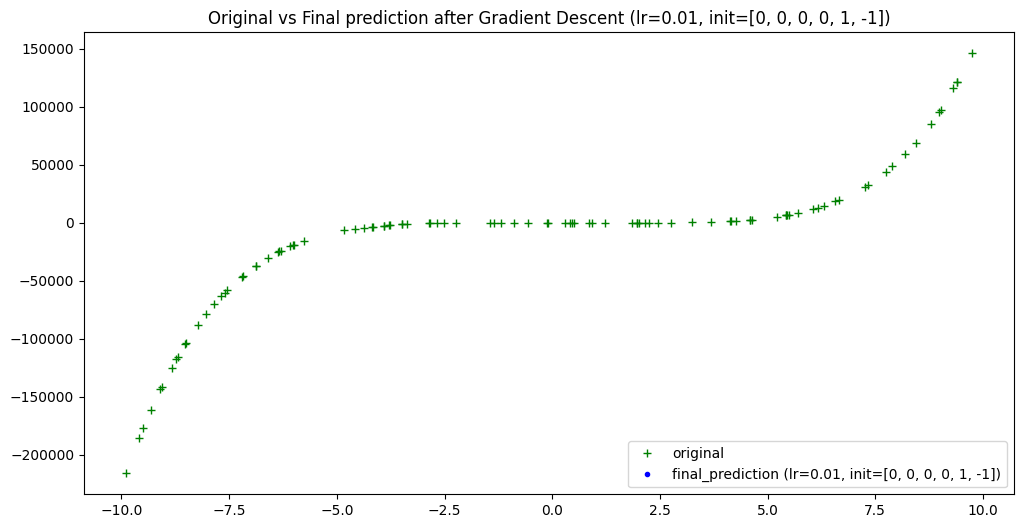

Final Coefficients predicted (lr=0.01, init=[0, 0, 0, 0, 1, -1]): (nan, nan, nan, nan, nan, nan)


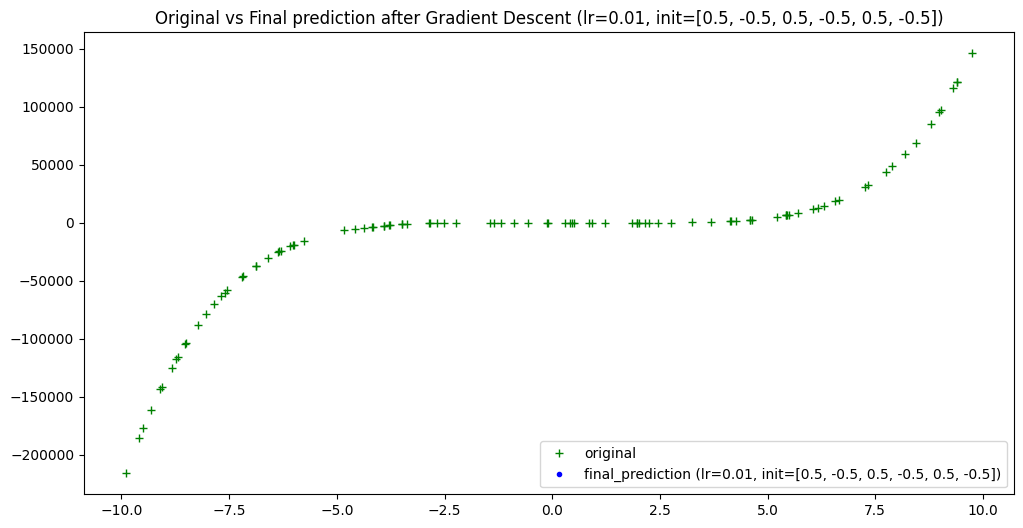

Final Coefficients predicted (lr=0.01, init=[0.5, -0.5, 0.5, -0.5, 0.5, -0.5]): (nan, nan, nan, nan, nan, nan)


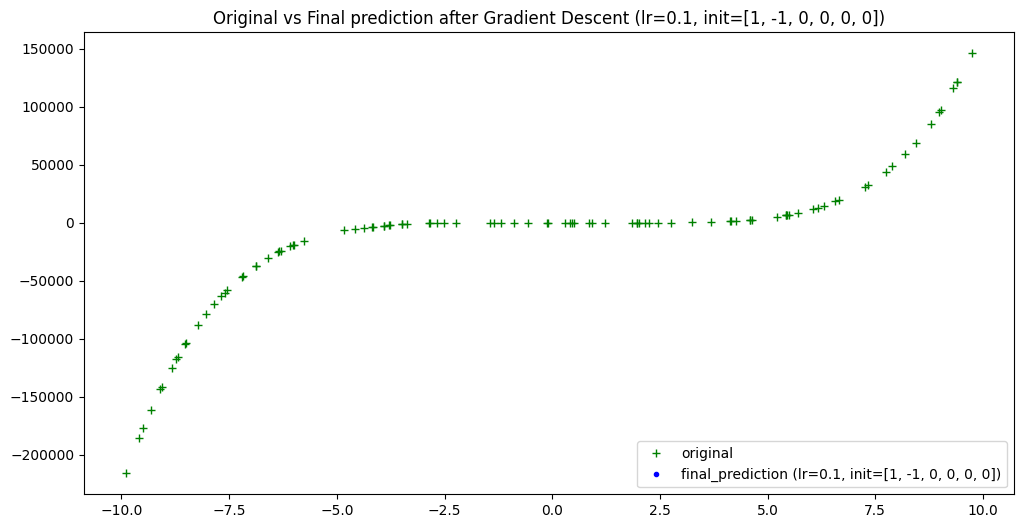

Final Coefficients predicted (lr=0.1, init=[1, -1, 0, 0, 0, 0]): (nan, nan, nan, nan, nan, nan)


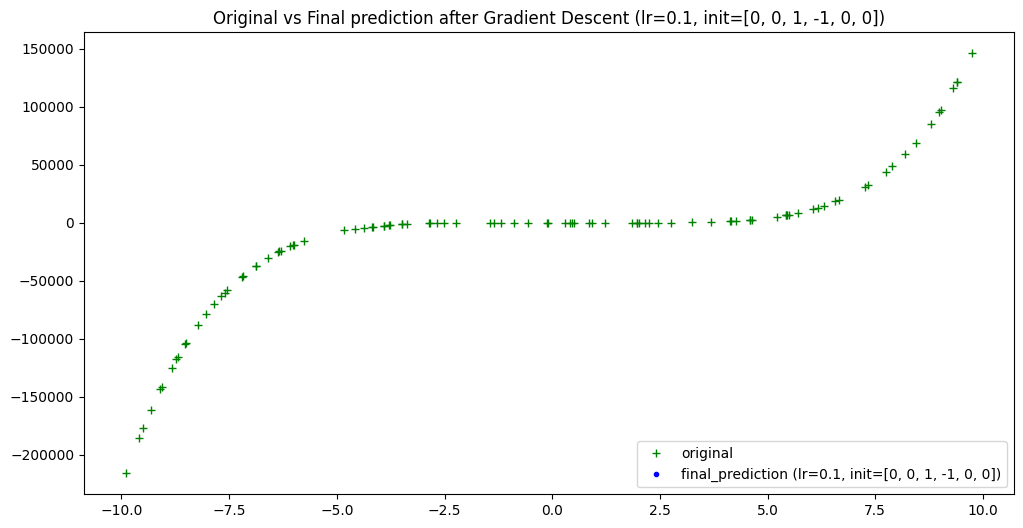

Final Coefficients predicted (lr=0.1, init=[0, 0, 1, -1, 0, 0]): (nan, nan, nan, nan, nan, nan)


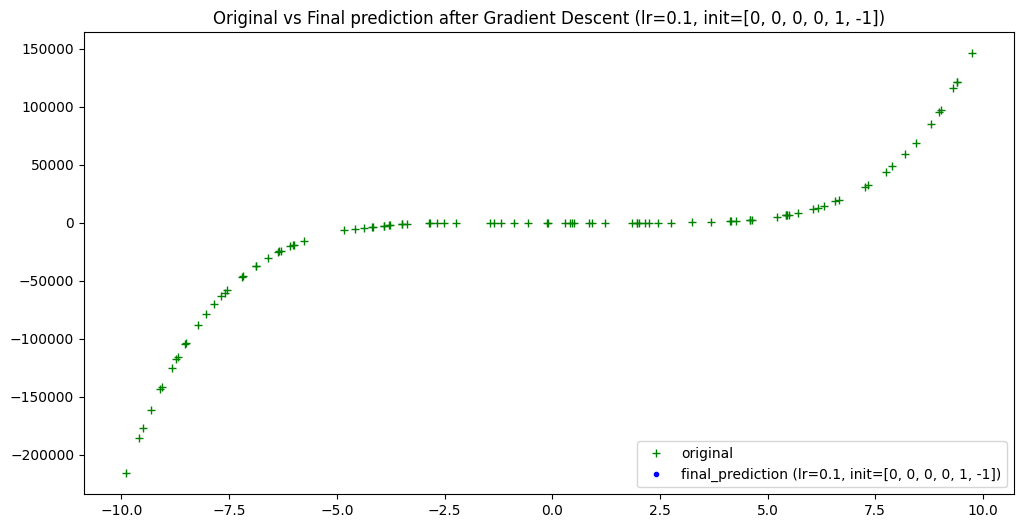

Final Coefficients predicted (lr=0.1, init=[0, 0, 0, 0, 1, -1]): (nan, nan, nan, nan, nan, nan)


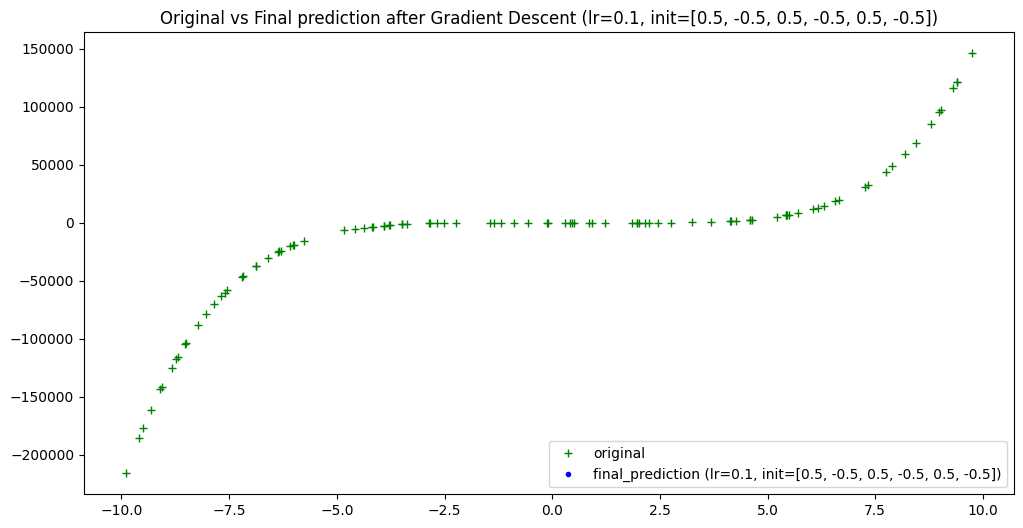

Final Coefficients predicted (lr=0.1, init=[0.5, -0.5, 0.5, -0.5, 0.5, -0.5]): (nan, nan, nan, nan, nan, nan)


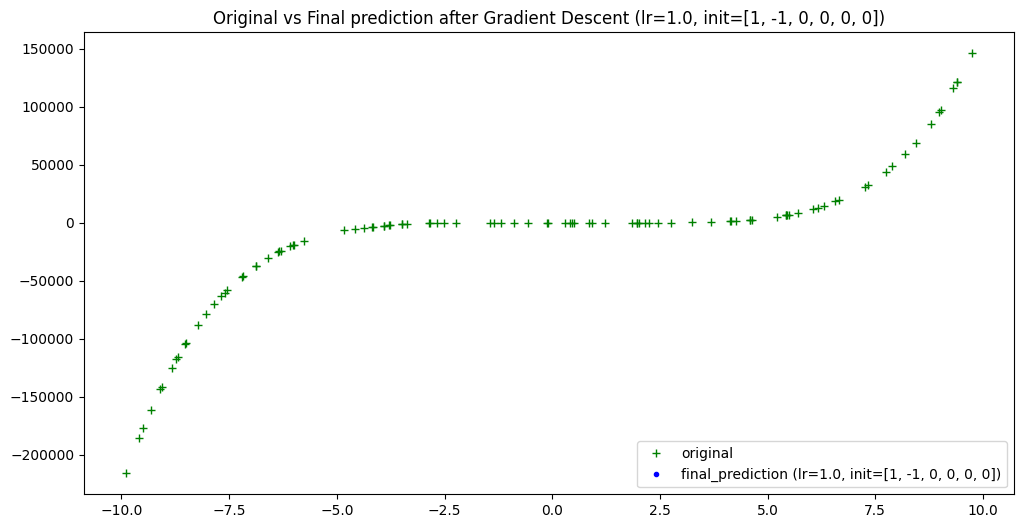

Final Coefficients predicted (lr=1.0, init=[1, -1, 0, 0, 0, 0]): (nan, nan, nan, nan, nan, nan)


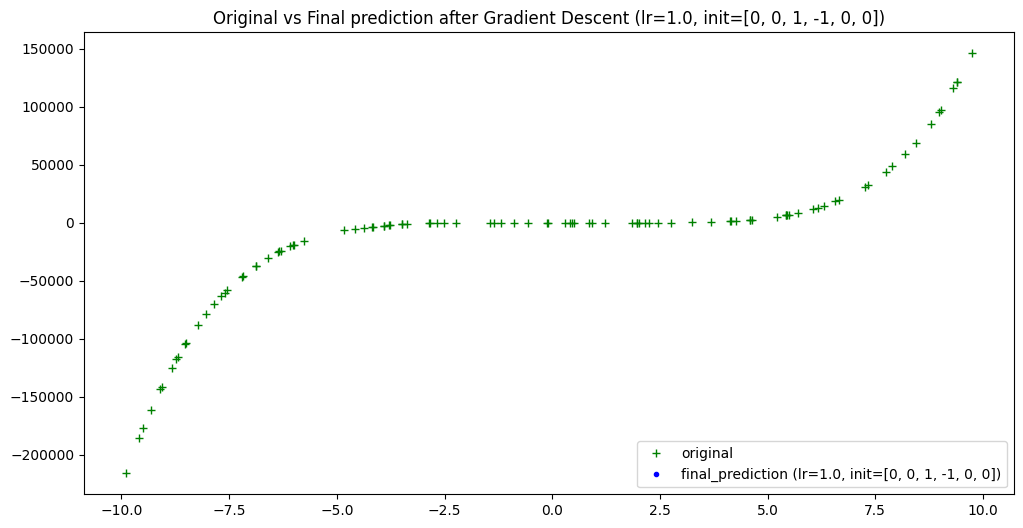

Final Coefficients predicted (lr=1.0, init=[0, 0, 1, -1, 0, 0]): (nan, nan, nan, nan, nan, nan)


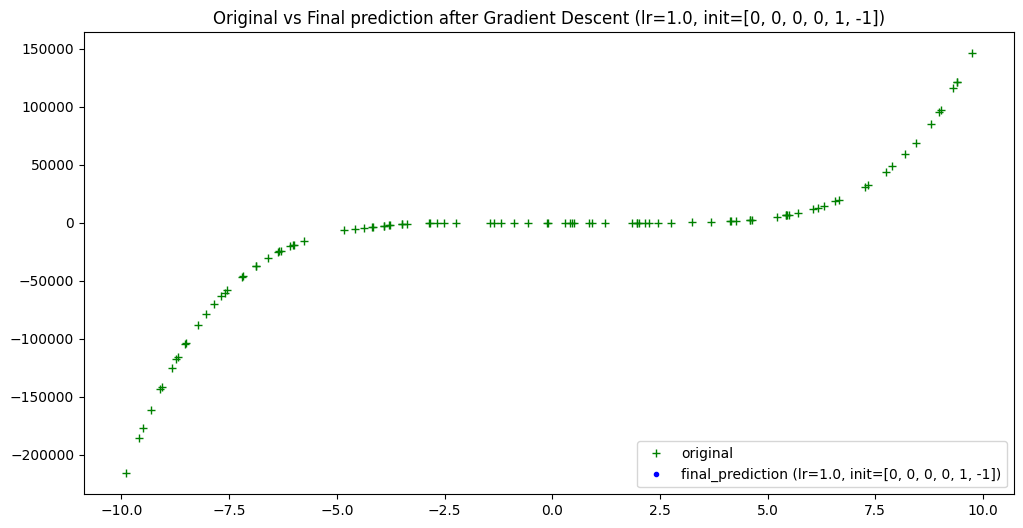

Final Coefficients predicted (lr=1.0, init=[0, 0, 0, 0, 1, -1]): (nan, nan, nan, nan, nan, nan)


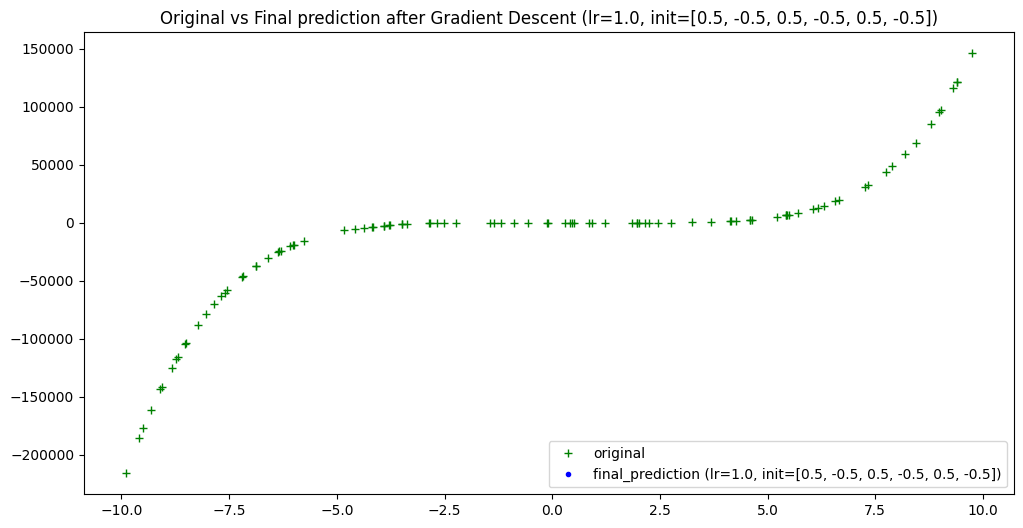

Final Coefficients predicted (lr=1.0, init=[0.5, -0.5, 0.5, -0.5, 0.5, -0.5]): (nan, nan, nan, nan, nan, nan)


In [71]:
for lr in lr_values:
    for init_coeffs in initializations:
        GD = gradient_descent(30000, lr, init_coeffs)

        plt.figure(figsize=(12, 6))
        plt.plot(hundred_xs, ys_degree_5, 'g+', label='original')
        plt.plot(hundred_xs, GD[2], 'b.', label=f'final_prediction (lr={lr}, init={init_coeffs})')
        plt.title(f'Original vs Final prediction after Gradient Descent (lr={lr}, init={init_coeffs})')
        plt.legend(loc="lower right")
        plt.show()

        print(f"Final Coefficients predicted (lr={lr}, init={init_coeffs}): {GD[1]}")

####Q4.Can you modify the algorithm to find a maxima of a function, instead of a minima?

In [72]:
def calc_gradient_5th_poly_for_GD_maxima(coeffs, inputs_x, outputs_y, lr):
    """
    Calculates the gradient for a fifth-degree polynomial to find a maxima.

    Args:
        coeffs: a, b, c, d, e, and f, for a fifth-degree polynomial [ y = ax^5 + bx^4 + cx^3 + dx^2 + ex + f ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the fifth-degree polynomial, as a tuple of its parts for a, b, c, d, e, and f respectively.

    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_pow_5 = x ** 5
        x_pow_4 = x ** 4
        x_pow_3 = x ** 3
        x_pow_2 = x ** 2
        x_pow_1 = x
        partial_a = x_pow_5 * (y_bar - y)  # Change here: positive gradient direction
        a_s.append(partial_a)
        partial_b = x_pow_4 * (y_bar - y)  # Change here: positive gradient direction
        b_s.append(partial_b)
        partial_c = x_pow_3 * (y_bar - y)  # Change here: positive gradient direction
        c_s.append(partial_c)
        partial_d = x_pow_2 * (y_bar - y)  # Change here: positive gradient direction
        d_s.append(partial_d)
        partial_e = x_pow_1 * (y_bar - y)  # Change here: positive gradient direction
        e_s.append(partial_e)
        partial_f = (y_bar - y)  # Change here: positive gradient direction
        f_s.append(partial_f)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (2 / n) * sum(a_s)  # Change here: positive gradient direction
    gradient_b = (2 / n) * sum(b_s)  # Change here: positive gradient direction
    gradient_c = (2 / n) * sum(c_s)  # Change here: positive gradient direction
    gradient_d = (2 / n) * sum(d_s)  # Change here: positive gradient direction
    gradient_e = (2 / n) * sum(e_s)  # Change here: positive gradient direction
    gradient_f = (2 / n) * sum(f_s)  # Change here: positive gradient direction

    a_new = coeffs[0] + lr * gradient_a  # Change here: update in the positive gradient direction
    b_new = coeffs[1] + lr * gradient_b  # Change here: update in the positive gradient direction
    c_new = coeffs[2] + lr * gradient_c  # Change here: update in the positive gradient direction
    d_new = coeffs[3] + lr * gradient_d  # Change here: update in the positive gradient direction
    e_new = coeffs[4] + lr * gradient_e  # Change here: update in the positive gradient direction
    f_new = coeffs[5] + lr * gradient_f  # Change here: update in the positive gradient direction

    new_model_coeffs = (a_new, b_new, c_new, d_new, e_new, f_new)

    # update with these new coeffs:
    new_y_bar = eval_5th_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar


In [73]:
def gradient_descent_maxima(epochs, lr, initial_coeffs):
    """
    Perform gradient descent for a fifth-degree polynomial to find a maxima.

    Args:
        epochs: number of iterations to perform finding new coefficients and updating loss.
        lr: specified learning rate
        initial_coeffs: initial coefficients for the polynomial

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    coeffs_to_test = initial_coeffs
    for i in range(epochs):
        loss = calc_gradient_5th_poly_for_GD_maxima(coeffs_to_test, hundred_xs, ys_degree_5, lr)
        coeffs_to_test = loss[1]
        losses.append(loss[0])
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)


In [74]:
lr_maxima = 0.001
init_coeffs_maxima = [1, -1, 0, 0, 0, 0]  # You can change the initialization as needed


In [75]:
GD_maxima = gradient_descent_maxima(30000, lr_maxima, init_coeffs_maxima)

<ipython-input-56-1dbddb50d350>:11: RuntimeWarning: overflow encountered in square
  return sum((ys - y_bar) ** 2) / len(ys)
<ipython-input-72-ba8a0666307a>:29: RuntimeWarning: overflow encountered in double_scalars
  partial_a = x_pow_5 * (y_bar - y)  # Change here: positive gradient direction
<ipython-input-72-ba8a0666307a>:31: RuntimeWarning: overflow encountered in double_scalars
  partial_b = x_pow_4 * (y_bar - y)  # Change here: positive gradient direction
<ipython-input-72-ba8a0666307a>:33: RuntimeWarning: overflow encountered in double_scalars
  partial_c = x_pow_3 * (y_bar - y)  # Change here: positive gradient direction
<ipython-input-72-ba8a0666307a>:46: RuntimeWarning: invalid value encountered in double_scalars
  gradient_b = (2 / n) * sum(b_s)  # Change here: positive gradient direction


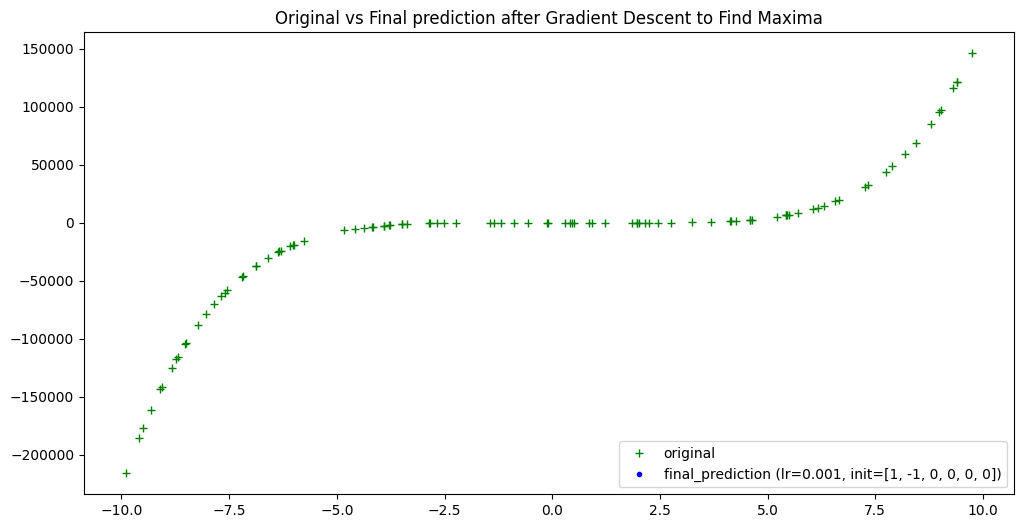

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(hundred_xs, ys_degree_5, 'g+', label='original')
plt.plot(hundred_xs, GD_maxima[2], 'b.', label=f'final_prediction (lr={lr_maxima}, init={init_coeffs_maxima})')
plt.title(f'Original vs Final prediction after Gradient Descent to Find Maxima')
plt.legend(loc="lower right")
plt.show()


In [77]:
print(f"Final Coefficients predicted (lr={lr_maxima}, init={init_coeffs_maxima}): {GD_maxima[1]}")

Final Coefficients predicted (lr=0.001, init=[1, -1, 0, 0, 0, 0]): (nan, nan, nan, nan, nan, nan)
